In [1]:
import pandas as pd
df=pd.read_csv(r'car.data', header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
df.shape

(1728, 7)

In [3]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [4]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class'] 
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [7]:
df['doors']=df['doors'].replace('5more','5')
df['persons']=df['persons'].replace('more','5')

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df['doors']=df['doors'].astype(int)
df['persons']=df['persons'].astype(int)

In [10]:
df['lug_boot'].value_counts()

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

In [11]:
df['doors'].value_counts()

doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64

In [12]:
df.dtypes

buying      object
maint       object
doors        int32
persons      int32
lug_boot    object
safety      object
class       object
dtype: object

Encoding

In [13]:
!pip install category_encoders

In [14]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['buying','maint','lug_boot','safety'])
df=encoder.fit_transform(df)
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,2,2,1,1,unacc
1,1,1,2,2,1,2,unacc
2,1,1,2,2,1,3,unacc
3,1,1,2,2,2,1,unacc
4,1,1,2,2,2,2,unacc


Split the dataset into input features and target columns

In [15]:
x=df.drop('class', axis=1)
y=df['class']
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,2,2,1,1
1,1,1,2,2,1,2
2,1,1,2,2,1,3
3,1,1,2,2,2,1
4,1,1,2,2,2,2


In [16]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

Divide into train dataset and test dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0) 

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1157, 6), (571, 6), (1157,), (571,))

In [19]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,4,1,2,5,2,2
124,1,2,2,4,3,2
648,2,3,2,2,1,1
249,1,3,3,2,3,1
1599,4,3,5,2,3,1


In [20]:
y_test.head()

1318    unacc
124     unacc
648     unacc
249     unacc
1599    unacc
Name: class, dtype: object

Apply ML Algo into training data

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=classifier.predict(x_test)
y_pred[:5]

array(['acc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [23]:
y_test[:5]

1318    unacc
124     unacc
648     unacc
249     unacc
1599    unacc
Name: class, dtype: object

Model Evalation

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.9702276707530648

In [25]:
print(confusion_matrix(y_test, y_pred))

[[122   2   1   1]
 [  2  23   0   2]
 [  6   0 393   0]
 [  3   0   0  16]]


<Axes: >

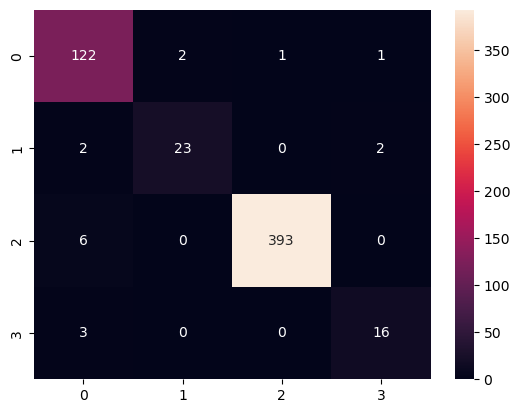

In [26]:
import seaborn as sns 
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.92      0.97      0.94       126
        good       0.92      0.85      0.88        27
       unacc       1.00      0.98      0.99       399
       vgood       0.84      0.84      0.84        19

    accuracy                           0.97       571
   macro avg       0.92      0.91      0.91       571
weighted avg       0.97      0.97      0.97       571



Visualize the feature scores of input features

In [28]:
classifier.feature_importances_

array([0.15337809, 0.1469201 , 0.0631206 , 0.25069565, 0.08837249,
       0.29751308])

In [29]:
feature_scores=pd.Series(classifier.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

safety      0.297513
persons     0.250696
buying      0.153378
maint       0.146920
lug_boot    0.088372
doors       0.063121
dtype: float64

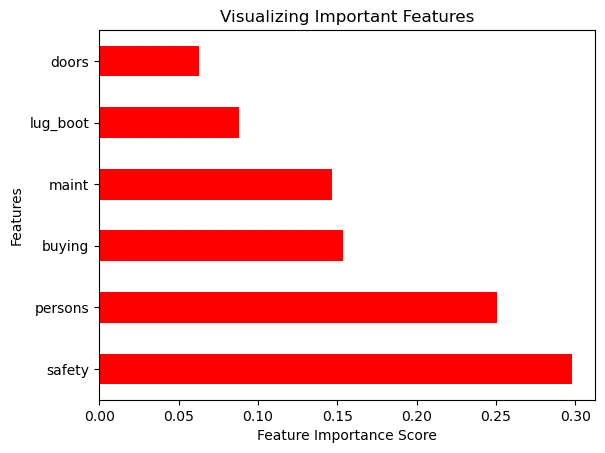

In [30]:
import matplotlib.pyplot as plt
feature_scores.plot(kind='barh', color='red')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [42]:
x1 = x.drop(columns=['doors'], axis=1)
x1

,buying,maint,persons,lug_boot,safety
0,1,1,2,1,1
1,1,1,2,1,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,1,2,2,2
...,...,...,...,...,...
1723,4,4,5,2,2
1724,4,4,5,2,3
1725,4,4,5,3,1
1726,4,4,5,3,2


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.33,random_state=0) 

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1157, 5), (571, 5), (1157,), (571,))

In [45]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test, y_test)

0.9334500875656743

In [46]:
x_train.head()

,buying,maint,persons,lug_boot,safety
1261,3,4,5,1,2
1727,4,4,5,3,3
548,2,2,2,3,3
1507,4,2,5,2,2
494,2,1,2,3,3


In [48]:
model=RandomForestClassifier(n_estimators=200, criterion='entropy')
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.9299474605954466

In [59]:
model2=RandomForestClassifier(n_estimators=300, criterion='entropy')
model2.fit(x_train,y_train)
model2.score(x_test, y_test)

0.9334500875656743

Summary: Using Random Forest Classifier with default parameter we have got accuracy score of 97.02%, dropping doors columns we have got random forest classifier accuracy score of 93.34% and changing the parameter n_estimators and criterion we have got 92.99% accuracy score. 